# Classification Problem
## Maks some data

In [52]:
import sklearn
from sklearn.datasets import make_classification,make_circles
n_samples = 1000
x,y=make_circles(n_samples=n_samples,random_state=42)

In [53]:
import pandas as pd
circles=pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"label":y})
circles.head()

,X1,X2,label
0,0.772305,0.208673,1
1,-0.789349,0.130110,1
2,-0.793692,0.100267,1
3,-0.340623,0.723862,1
4,0.437116,-0.899405,0


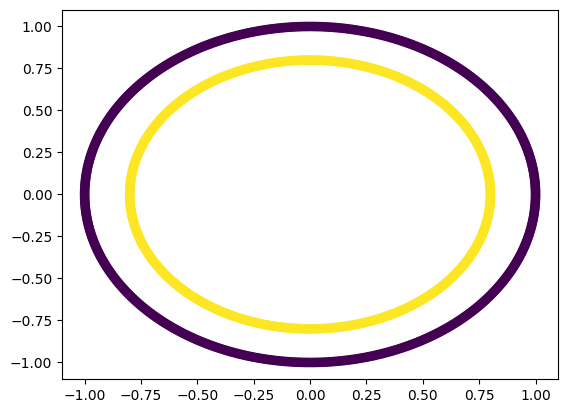

In [54]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],y=x[:,1],c=y)

In [55]:
#Turn data into tensors
import torch
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)



In [56]:
type(x)

torch.Tensor

In [57]:
from sklearn.model_selection import train_test_split
torch.manual_seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Build a model

In [58]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [59]:
import torch
import torch.nn as nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer_2((self.layer_1(x)))

In [60]:
model_0=CircleModel().to(device)

In [61]:
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [62]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

# Train model

In [63]:
import torch
import torch.nn as nn

# Define the model
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        x = (self.layer_1(x))  # Apply activation function
        return self.layer_2(x)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_0 = CircleModel().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    y_pred = y_pred.squeeze().long()
    y_true = y_true.long()
    correct = (y_true == y_pred).sum().item()
    total = y_true.size(0)
    return correct / total

# Training loop
for epoch in range(1000):
    model_0.train()

    # Forward pass
    y_logits = model_0(x_train.to(device))
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Compute loss
    loss = loss_fn(y_logits.squeeze(), y_train.to(device))

    # Calculate training accuracy
    train_acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred.to(device))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        model_0.eval()
        with torch.no_grad():
            # Evaluate on test set
            test_logits = model_0(x_test.to(device))
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits.squeeze(), y_test.to(device))

            # Calculate test accuracy
            test_acc = accuracy_fn(y_true=y_test.to(device), y_pred=test_pred.to(device))

            # Print loss and accuracy
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {train_acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")


Epoch: 0 | Train Loss: 0.69787 | Train Acc: 0.52125 | Test Loss: 0.69472 | Test Acc: 0.58000
Epoch: 100 | Train Loss: 0.69587 | Train Acc: 0.51250 | Test Loss: 0.69324 | Test Acc: 0.55000
Epoch: 200 | Train Loss: 0.69489 | Train Acc: 0.51500 | Test Loss: 0.69267 | Test Acc: 0.50500
Epoch: 300 | Train Loss: 0.69435 | Train Acc: 0.51125 | Test Loss: 0.69244 | Test Acc: 0.50500
Epoch: 400 | Train Loss: 0.69401 | Train Acc: 0.50875 | Test Loss: 0.69237 | Test Acc: 0.50500
Epoch: 500 | Train Loss: 0.69379 | Train Acc: 0.50625 | Test Loss: 0.69237 | Test Acc: 0.50500
Epoch: 600 | Train Loss: 0.69363 | Train Acc: 0.50375 | Test Loss: 0.69242 | Test Acc: 0.51000
Epoch: 700 | Train Loss: 0.69351 | Train Acc: 0.50125 | Test Loss: 0.69248 | Test Acc: 0.52000
Epoch: 800 | Train Loss: 0.69343 | Train Acc: 0.50375 | Test Loss: 0.69255 | Test Acc: 0.50500
Epoch: 900 | Train Loss: 0.69336 | Train Acc: 0.50375 | Test Loss: 0.69262 | Test Acc: 0.50500


In [64]:
from pathlib import Path
import requests
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  print("helper_functions.py downloaded")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)


helper_functions.py already exists


In [65]:
from helper_functions import *

Text(0.5, 1.0, 'Test')

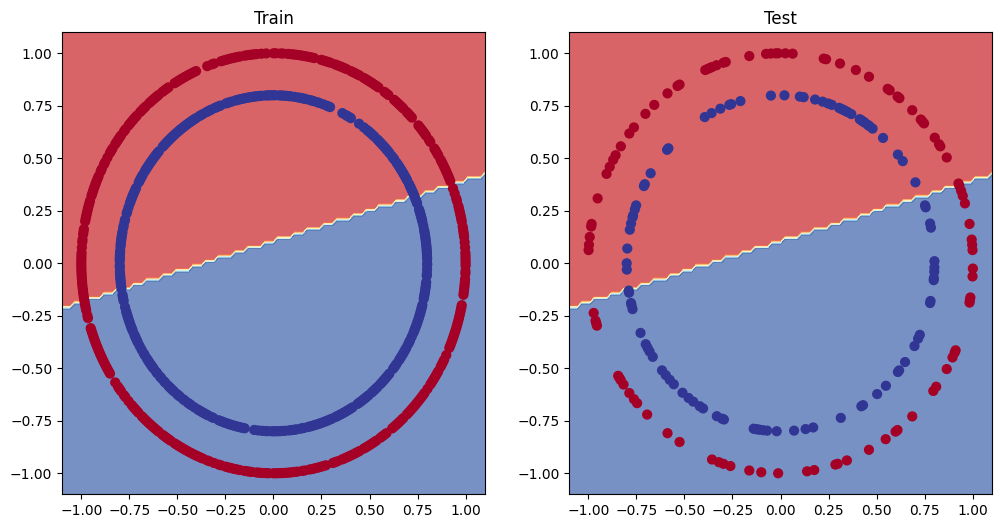

In [66]:
##plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_0,x_train,y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(model_0,x_test,y_test)
plt.title("Test")

In [67]:
##Improvements
class CircleModelVI(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(torch.relu(self.layer_2(torch.relu(self.layer_1(x)))))
model_1=CircleModelVI().to(device)
model_1


CircleModelVI(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [68]:
import torch
import torch.nn as nn

# Define the model with additional layers and ReLU activations
class CircleModelVI(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = (self.layer_1(x))
        x = (self.layer_2(x))
        x = self.layer_3(x)
        return x

# Instantiate the model and move it to the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_1 = CircleModelVI().to(device)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    y_pred = y_pred.squeeze().long()  # Convert predictions to long type
    y_true = y_true.long()            # Convert ground truth to long type
    correct = (y_true == y_pred).sum().item()
    total = y_true.size(0)
    return correct / total

# Define loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# Set random seed for reproducibility
torch.manual_seed(42)

# Training loop
for epoch in range(1000):
    model_1.train()

    # Forward pass
    y_logits = model_1(x_train.to(device))
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Compute loss
    loss = loss_fn(y_logits.squeeze(), y_train.to(device))

    # Calculate training accuracy
    train_acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred.to(device))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  # Corrected: Added parentheses

    if epoch % 100 == 0:
        model_1.eval()
        with torch.no_grad():
            # Evaluate on test set
            test_logits = model_1(x_test.to(device))
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits.squeeze(), y_test.to(device))

            # Calculate test accuracy
            test_acc = accuracy_fn(y_true=y_test.to(device), y_pred=test_pred.to(device))

            # Print loss and accuracy
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {train_acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")


Epoch: 0 | Train Loss: 0.70617 | Train Acc: 0.50000 | Test Loss: 0.70312 | Test Acc: 0.50000
Epoch: 100 | Train Loss: 0.69601 | Train Acc: 0.50000 | Test Loss: 0.69410 | Test Acc: 0.50000
Epoch: 200 | Train Loss: 0.69386 | Train Acc: 0.50000 | Test Loss: 0.69267 | Test Acc: 0.50000
Epoch: 300 | Train Loss: 0.69338 | Train Acc: 0.40250 | Test Loss: 0.69265 | Test Acc: 0.41000
Epoch: 400 | Train Loss: 0.69325 | Train Acc: 0.47250 | Test Loss: 0.69283 | Test Acc: 0.52000
Epoch: 500 | Train Loss: 0.69319 | Train Acc: 0.50000 | Test Loss: 0.69301 | Test Acc: 0.52000
Epoch: 600 | Train Loss: 0.69315 | Train Acc: 0.59500 | Test Loss: 0.69316 | Test Acc: 0.58000
Epoch: 700 | Train Loss: 0.69312 | Train Acc: 0.53125 | Test Loss: 0.69330 | Test Acc: 0.51000
Epoch: 800 | Train Loss: 0.69309 | Train Acc: 0.52250 | Test Loss: 0.69341 | Test Acc: 0.49000
Epoch: 900 | Train Loss: 0.69307 | Train Acc: 0.51750 | Test Loss: 0.69352 | Test Acc: 0.48500


Text(0.5, 1.0, 'Test')

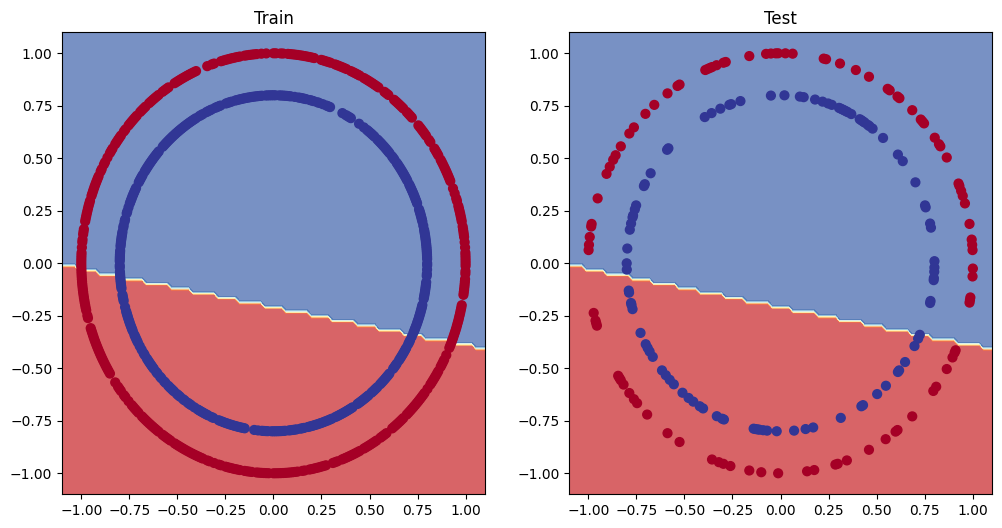

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_1,x_train,y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(model_1,x_test,y_test)
plt.title("Test")

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [71]:
#build model with activation function(for non linear data)
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [72]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [73]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)
def accuracy_fn(y_true, y_pred):
    y_pred = y_pred.squeeze().long()  # Convert predictions to long type
    y_true = y_true.long()            # Convert ground truth to long type
    correct = (y_true == y_pred).sum().item()
    total = y_true.size(0)
    return correct / total
for epoch in range(1000):
  model_3.train()
  y_logits=model_3(x_train.to(device))
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits.squeeze(),y_train.to(device))
  acc=accuracy_fn(y_true=y_train.to(device),y_pred=y_pred.to(device))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100==0:
    model_3.eval()
    with torch.no_grad():
      test_logits=model_3(x_test.to(device))
      test_pred=torch.round(torch.sigmoid(test_logits))
      test_loss=loss_fn(test_logits.squeeze(),y_test.to(device))
      test_acc=accuracy_fn(y_true=y_test.to(device),y_pred=test_pred.to(device))
      # Print loss and accuracy
      print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

Epoch: 0 | Train Loss: 0.69296 | Train Acc: 0.50000 | Test Loss: 0.69300 | Test Acc: 0.50000
Epoch: 100 | Train Loss: 0.69118 | Train Acc: 0.53250 | Test Loss: 0.69070 | Test Acc: 0.54000
Epoch: 200 | Train Loss: 0.68985 | Train Acc: 0.53250 | Test Loss: 0.68890 | Test Acc: 0.55500
Epoch: 300 | Train Loss: 0.68807 | Train Acc: 0.53125 | Test Loss: 0.68649 | Test Acc: 0.57000
Epoch: 400 | Train Loss: 0.68527 | Train Acc: 0.53250 | Test Loss: 0.68299 | Test Acc: 0.57000
Epoch: 500 | Train Loss: 0.68128 | Train Acc: 0.53375 | Test Loss: 0.67767 | Test Acc: 0.57000
Epoch: 600 | Train Loss: 0.67549 | Train Acc: 0.53500 | Test Loss: 0.67028 | Test Acc: 0.58500
Epoch: 700 | Train Loss: 0.66667 | Train Acc: 0.57125 | Test Loss: 0.65905 | Test Acc: 0.63000
Epoch: 800 | Train Loss: 0.65182 | Train Acc: 0.64250 | Test Loss: 0.64227 | Test Acc: 0.70500
Epoch: 900 | Train Loss: 0.62397 | Train Acc: 0.73750 | Test Loss: 0.61388 | Test Acc: 0.78500


In [74]:
model_3.eval()
with torch.inference_mode():
  y_logits=model_3(x_test.to(device))
  y_pred=torch.round(torch.sigmoid(y_logits))

Text(0.5, 1.0, 'Test')

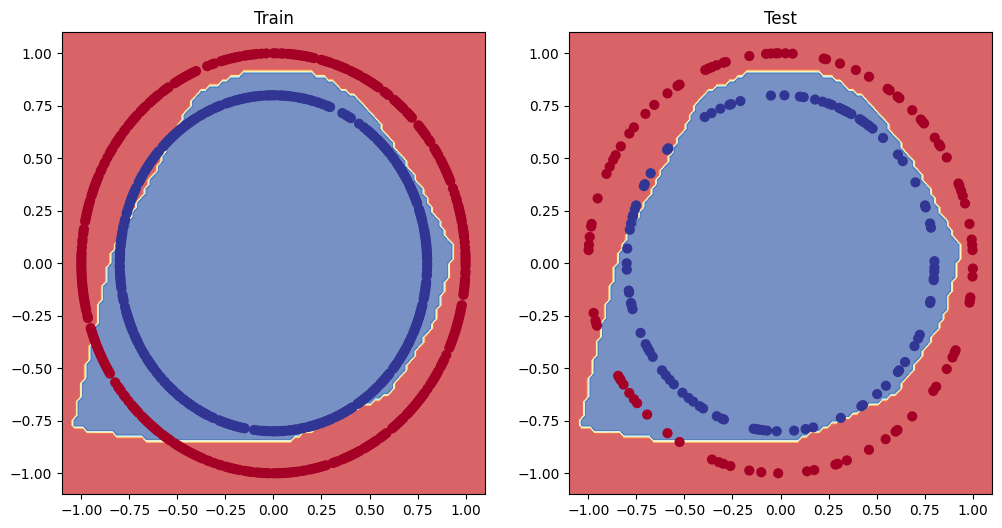

In [75]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_3,x_train,y_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(model_3,x_test,y_test)
plt.title("Test")

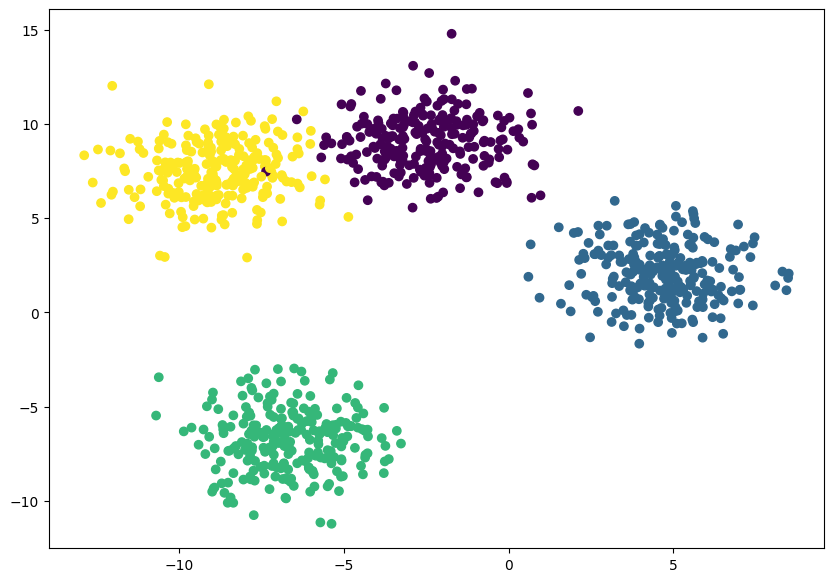

In [76]:
##Multi class classification
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary

# Create dataset
n_samples = 1000
X_blob, y_blob = make_blobs(n_samples=n_samples,
                            n_features=2,
                            centers=4,
                            cluster_std=1.5,
                            random_state=42)

# Create tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

In [77]:
## Build model
class MultiClassModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.layer_1=nn.Linear(in_features=input_features,out_features=hidden_units)
    self.layer_2=nn.Linear(in_features=hidden_units,out_features=hidden_units)
    self.layer_3=nn.Linear(in_features=hidden_units,out_features=output_features)
    self.relu=nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_4=MultiClassModel(input_features=2,output_features=4).to(device)
model_4

MultiClassModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
)

In [79]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2,random_state=42)

for epoch in range(1000):
  model_4.train()
  y_logits=model_4(X_blob_train.to(device))
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss=loss_fn(y_logits,y_blob_train.to(device))
  acc=accuracy_fn(y_true=y_blob_train.to(device),y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100==0:
    model_4.eval()
    with torch.inference_mode():
      test_logits=model_4(X_blob_test.to(device))
      test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
      test_loss=loss_fn(test_logits,y_blob_test.to(device))
      test_acc=accuracy_fn(y_true=y_blob_test.to(device),y_pred=test_pred)
      print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

Epoch: 0 | Train Loss: 0.02230 | Train Acc: 0.99250 | Test Loss: 0.01095 | Test Acc: 0.99500
Epoch: 100 | Train Loss: 0.02207 | Train Acc: 0.99250 | Test Loss: 0.01073 | Test Acc: 0.99500
Epoch: 200 | Train Loss: 0.02186 | Train Acc: 0.99250 | Test Loss: 0.01052 | Test Acc: 0.99500
Epoch: 300 | Train Loss: 0.02167 | Train Acc: 0.99375 | Test Loss: 0.01033 | Test Acc: 0.99500
Epoch: 400 | Train Loss: 0.02147 | Train Acc: 0.99375 | Test Loss: 0.01015 | Test Acc: 0.99500
Epoch: 500 | Train Loss: 0.02129 | Train Acc: 0.99375 | Test Loss: 0.00998 | Test Acc: 0.99500
Epoch: 600 | Train Loss: 0.02111 | Train Acc: 0.99500 | Test Loss: 0.00982 | Test Acc: 0.99500
Epoch: 700 | Train Loss: 0.02094 | Train Acc: 0.99500 | Test Loss: 0.00966 | Test Acc: 0.99500
Epoch: 800 | Train Loss: 0.02078 | Train Acc: 0.99500 | Test Loss: 0.00950 | Test Acc: 0.99500
Epoch: 900 | Train Loss: 0.02062 | Train Acc: 0.99500 | Test Loss: 0.00935 | Test Acc: 0.99500


Text(0.5, 1.0, 'Test')

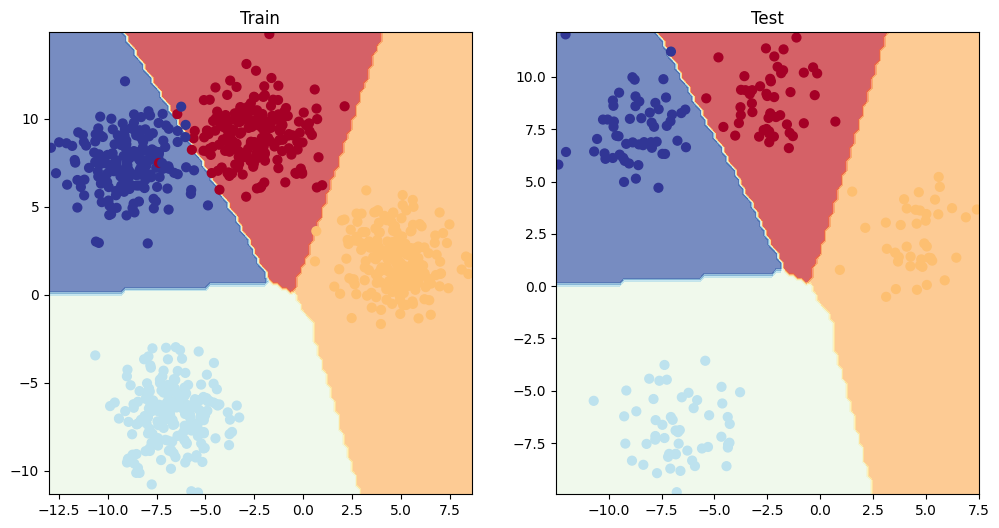

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(model_4,X_blob_test,y_blob_test)
plt.title("Test")

In [86]:
device="cuda" if torch.cuda.is_available() else "cpu"
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

In [85]:
device

'cuda'

In [81]:
#other metrics
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 27.4 MB/s eta 0:00:00


In [88]:
from torchmetrics import Accuracy
torchmetrics_acc=Accuracy(task="multiclass",num_classes=4).to(device)
torchmetrics_acc(y_pred,y_blob_test)

tensor(0.9950, device='cuda:0')